In [4]:
#zomato data analysis



#step 1 importing libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns





#step2 importing csv file or creating data frame
df = pd.read_csv('Zomato data .csv')

df





,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [7]:
#data cleaning

#Coverting the data type of the coloumn rating as a instead of a/b


def  handlerate(value):
    value=str(value).split('/')
    value = value[0]
    return float(value)
    
df['rate'] = df['rate'].apply(handlerate)

print(df.head())



                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [8]:
#checking for missing values in the data set df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


AttributeError: module 'seaborn' has no attribute 'xlabel'

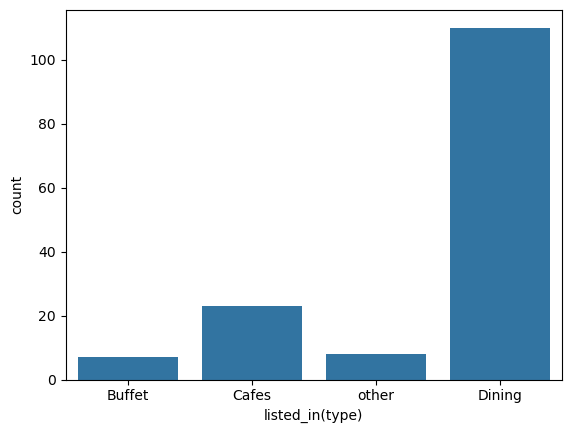

In [9]:
#que no 1 type of restuarent with majority of orders

df.head()

sns.countplot(x=df['listed_in(type)'])
sns.xlabel['type of retuarant']




In [ ]:
# majority of retuarant falls in the dining category


In [10]:


#que no 2 : how many votes has each type of restuarant has recieved

df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64
                 votes
listed_in(type)       
Buffet            3028
Cafes             6434
Dining           20363
other             9367


TypeError: plot() got an unexpected keyword argument 'x'

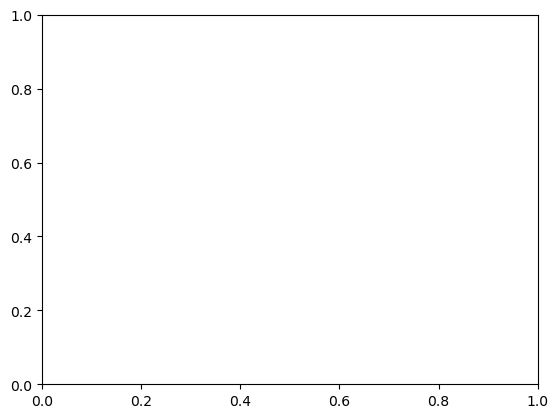

In [28]:
groupdata = df.groupby('listed_in(type)')['votes'].sum()
print(groupdata)
result = pd.DataFrame({'votes':groupdata})
print(result)
plt.plot(x = result ,  color='green' , marker = '*')
plt.xlabel('type of restuarant' , c='red' , size=20)
plt.ylabel('Votes' , c='red' , size=20)
plt.show()



In [16]:
#conclusion : dining restuarants has maximum no. of votes recieved


#que 3 : what are the ratings that majority type of restuarants has recieved

df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


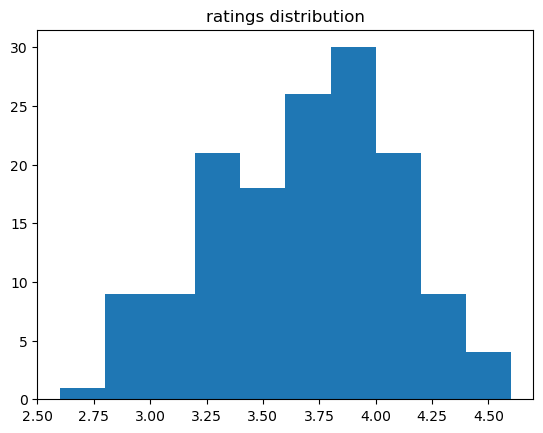

In [19]:
plt.hist(df['rate'],bins = 10)
plt.title("ratings distribution")
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

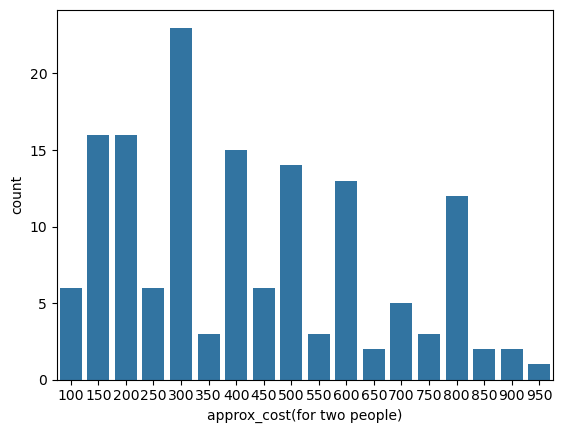

In [21]:
#conlusion : majority restuarant reecieved rating from 3.5 to 4




#que 4: most couple order their food online , so what is their average spending on each other
#avg order spending by two couples

coupledata = df['approx_cost(for two people)']
sns.countplot(x = coupledata)


<Axes: xlabel='online_order', ylabel='rate'>

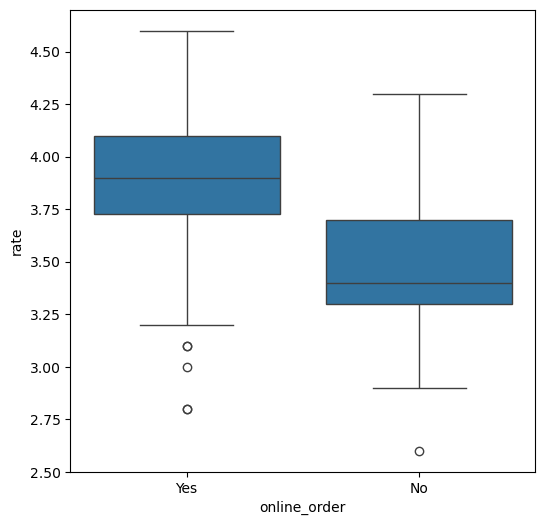

In [29]:
#conclusion : 300 is the avg amt. spend by most of the (couple) for their food order


#que 4 : online or offline which mode got highest rating

plt.figure(figsize=(6,6))
sns.boxplot(x='online_order' , y = 'rate' , data = df)

#colcusion : online orders got highest ratings so far








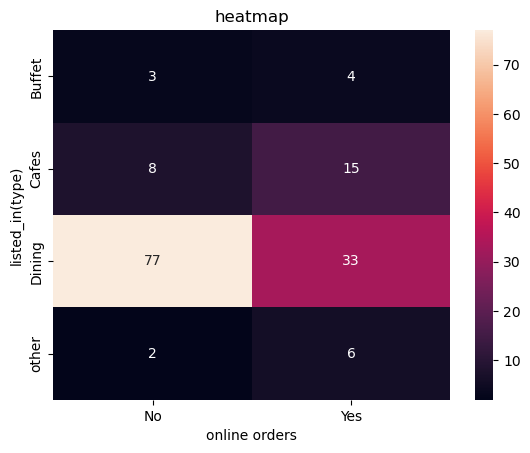

In [26]:
#que 6: which type of restuarants recieved more offline orders , so that zomato can provide customers with some good offers

pivottable = df.pivot_table(index='listed_in(type)', columns = 'online_order' , aggfunc = 'size' , fill_value=0)
sns.heatmap(pivottable , annot= True , fmt='d')
plt.title("heatmap")
plt.xlabel("online orders")
plt.ylabel("listed_in(type)")
plt.show()





#conclusion : dining restuarants primarily accept offlin orders , whereas cafes primarily recieve online orders . this suggests that clients prefer orders in person at restuarants , but prefer online ordering at cafes

